In [1]:
from google.colab import files
uploaded = files.upload()


Saving telecom_churn.csv to telecom_churn.csv


In [2]:
import pandas as pd

file_path = 'telecom_churn.csv'

data = pd.read_csv(file_path)

print(data.head())
print("Dataset shape:", data.shape)
print(data.info())


   customer_id telecom_partner gender  age              state     city  \
0            1    Reliance Jio      F   25          Karnataka  Kolkata   
1            2    Reliance Jio      F   55            Mizoram   Mumbai   
2            3        Vodafone      F   57  Arunachal Pradesh    Delhi   
3            4            BSNL      M   46         Tamil Nadu  Kolkata   
4            5            BSNL      F   26            Tripura    Delhi   

   pincode date_of_registration  num_dependents  estimated_salary  calls_made  \
0   755597           2020-01-01               4            124962          44   
1   125926           2020-01-01               2            130556          62   
2   423976           2020-01-01               0            148828          49   
3   522841           2020-01-01               1             38722          80   
4   740247           2020-01-01               2             55098          78   

   sms_sent  data_used  churn  
0        45       -361      0  
1   

churn
0    194726
1     48827
Name: count, dtype: int64


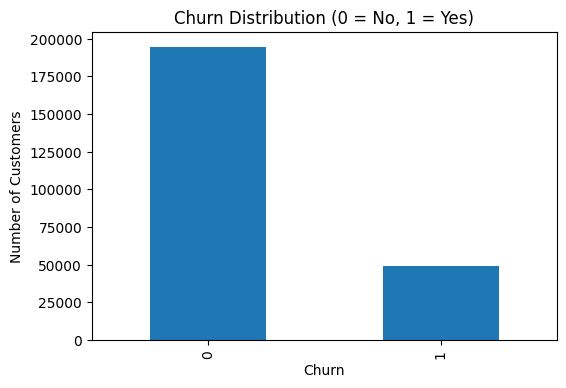

In [3]:
import matplotlib.pyplot as plt


churn_counts = data['churn'].value_counts()
print(churn_counts)


plt.figure(figsize=(6,4))
churn_counts.plot(kind='bar')
plt.title('Churn Distribution (0 = No, 1 = Yes)')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()


In [4]:

print("Duplicate rows:", data.duplicated().sum())


print("Missing values per column:\n", data.isnull().sum())


Duplicate rows: 0
Missing values per column:
 customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64


In [5]:

data['gender'] = data['gender'].map({'M': 0, 'F': 1})


data = pd.get_dummies(data, columns=['telecom_partner', 'state', 'city'], drop_first=True)

print("Columns after encoding:", data.columns)
print(data.head(3))


Columns after encoding: Index(['customer_id', 'gender', 'age', 'pincode', 'date_of_registration',
       'num_dependents', 'estimated_salary', 'calls_made', 'sms_sent',
       'data_used', 'churn', 'telecom_partner_BSNL',
       'telecom_partner_Reliance Jio', 'telecom_partner_Vodafone',
       'state_Arunachal Pradesh', 'state_Assam', 'state_Bihar',
       'state_Chhattisgarh', 'state_Goa', 'state_Gujarat', 'state_Haryana',
       'state_Himachal Pradesh', 'state_Jharkhand', 'state_Karnataka',
       'state_Kerala', 'state_Madhya Pradesh', 'state_Maharashtra',
       'state_Manipur', 'state_Meghalaya', 'state_Mizoram', 'state_Nagaland',
       'state_Odisha', 'state_Punjab', 'state_Rajasthan', 'state_Sikkim',
       'state_Tamil Nadu', 'state_Telangana', 'state_Tripura',
       'state_Uttar Pradesh', 'state_Uttarakhand', 'state_West Bengal',
       'city_Chennai', 'city_Delhi', 'city_Hyderabad', 'city_Kolkata',
       'city_Mumbai'],
      dtype='object')
   customer_id  gender  age  

In [6]:
from sklearn.model_selection import train_test_split

X = data.drop(['customer_id', 'date_of_registration', 'churn'], axis=1)
y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (194842, 43)
Testing set shape: (48711, 43)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[38928     0]
 [ 9783     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     38928
           1       0.00      0.00      0.00      9783

    accuracy                           0.80     48711
   macro avg       0.40      0.50      0.44     48711
weighted avg       0.64      0.80      0.71     48711


ROC AUC Score: 0.5017038850117


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
!pip install imbalanced-learn


In [9]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE, counts of label '1': {}".format(sum(y_train_res==1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_res==0)))


After SMOTE, counts of label '1': 155798
After SMOTE, counts of label '0': 155798


In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]


from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[30424  8504]
 [ 7646  2137]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79     38928
           1       0.20      0.22      0.21      9783

    accuracy                           0.67     48711
   macro avg       0.50      0.50      0.50     48711
weighted avg       0.68      0.67      0.67     48711


ROC AUC Score: 0.49843299139203995


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)


y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba_rf))


Confusion Matrix:
 [[38136   792]
 [ 9579   204]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88     38928
           1       0.20      0.02      0.04      9783

    accuracy                           0.79     48711
   macro avg       0.50      0.50      0.46     48711
weighted avg       0.68      0.79      0.71     48711


ROC AUC Score: 0.5005111129870009
